In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
data = pd.read_csv('/content/drive/MyDrive/Minor Project 7th sem/india-news-headlines.csv')
print(data.head())


   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic  


In [22]:
data['publish_date'].duplicated()


,publish_date
0,False
1,True
2,True
3,True
4,True
...,...
3650965,True
3650966,True
3650967,True
3650968,True


In [23]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()


data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7717 non-null   int64 
 1   Date               7717 non-null   int64 
 2   headline_category  7717 non-null   object
 3   headline_text      7717 non-null   object
dtypes: int64(2), object(2)
memory usage: 241.3+ KB


In [27]:
data['headline_category'].value_counts()

,count
headline_category,
unknown,987
entertainment.hindi.bollywood,732
india,343
life-style.relationships.man-woman,332
edit-page,256
...,...
shobhaa-de.politically-incorrect,1
city.jammu,1
friendship-day,1


In [28]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data


,index,Date,headline_category,headline_text
8,642,20010110,city.patna,Fend for yourselves; Pande tells doctors
48,2215,20010309,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,20010522,city.pune,She turned and fought
116,4693,20010527,city.bengaluru,Need to boost exports; says bank head
118,4917,20010529,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7700,3642496,20220315,city.mumbai,Mumbaikars enjoy nightlife once more as restau...
7703,3643993,20220318,city.mumbai,Mumbai salons and spas deal with heavy demand ...
7707,3645983,20220322,city.patna,Sikta MLA pleads for police reform
7710,3647476,20220325,city.delhi,Speeding up; shortcuts and tackling unruly cus...


In [29]:
city_split = pd.DataFrame(columns=['city_name'])


city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]


# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)


# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)


# re-setting the index
city_data.reset_index(inplace=True)


# see the final data which contain city_name column
city_data.head()



,level_0,index,Date,headline_text,city_name
0,8,642,20010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,20010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,20010522,She turned and fought,pune
3,116,4693,20010527,Need to boost exports; says bank head,bengaluru
4,118,4917,20010529,US visit won't be piece of cake for Krishna,bengaluru


In [30]:
city_data.drop(['level_0', 'index'],axis=1)

,Date,headline_text,city_name
0,20010110,Fend for yourselves; Pande tells doctors,patna
1,20010309,Maneka asks govt to take back land for cow she...,delhi
2,20010522,She turned and fought,pune
3,20010527,Need to boost exports; says bank head,bengaluru
4,20010529,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
1412,20220315,Mumbaikars enjoy nightlife once more as restau...,mumbai
1413,20220318,Mumbai salons and spas deal with heavy demand ...,mumbai
1414,20220322,Sikta MLA pleads for police reform,patna
1415,20220325,Speeding up; shortcuts and tackling unruly cus...,delhi


In [31]:
city_data.city_name.unique()


array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur', 'thane',
       'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore', 'kolhapur',
       'agartala', 'madurai', 'bareilly', 'aurangabad', 'meerut',
       'visakhapatnam', 'trichy', 'coimbatore', 'jammu', 'dehradun',
       'nashik', 'noida', 'puducherry', 'erode', 'chennai', 'jind',
       'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

 **Representing number of headline text (News Headline) per city**

In [32]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})


#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)


# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73
chandigarh,59
goa,57


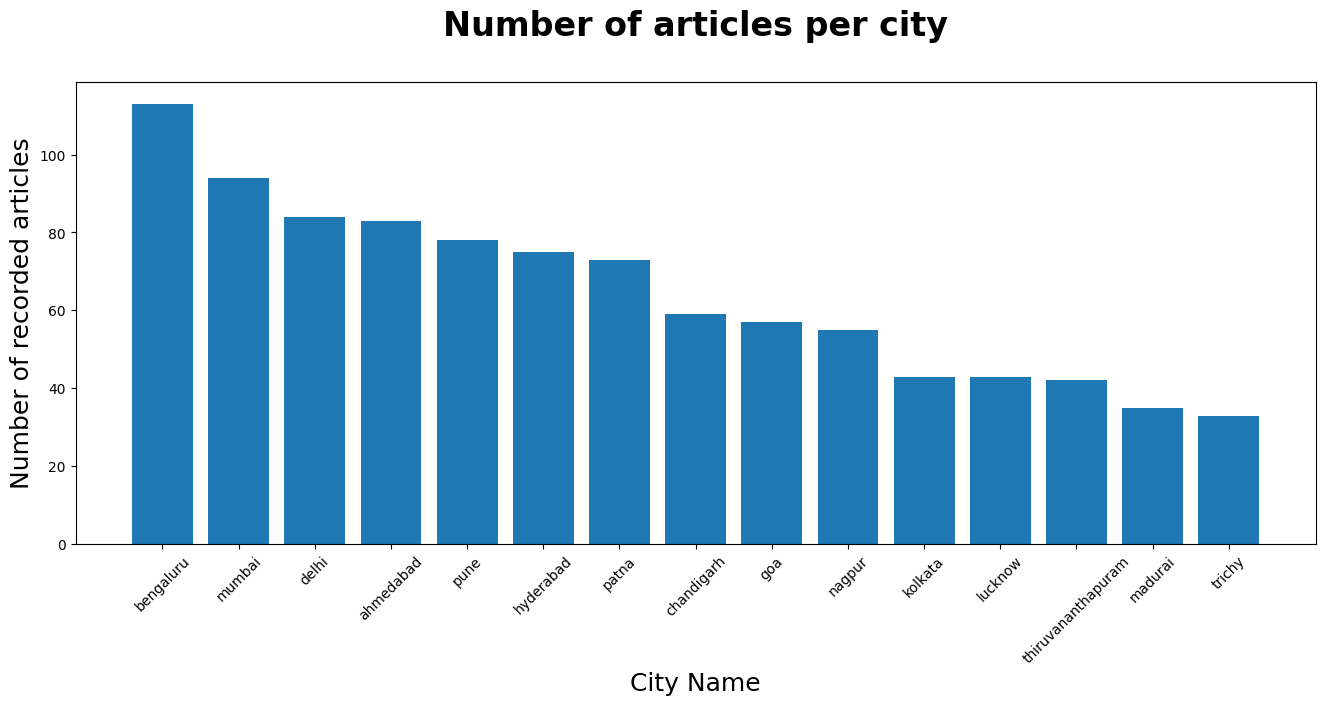

In [33]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

**Representing Number of News Headlines per year and per city**

In [34]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,1970-01-01 00:00:00.020010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,1970-01-01 00:00:00.020010522,She turned and fought,pune
3,116,4693,1970-01-01 00:00:00.020010527,Need to boost exports; says bank head,bengaluru
4,118,4917,1970-01-01 00:00:00.020010529,US visit won't be piece of cake for Krishna,bengaluru


from matplotlib import pyplot as plt
_df_51['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_53.groupby('headline_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_54.groupby('city_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('headline_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='headline_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='city_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('headline_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='headline_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='city_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_60['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city_name'].value_counts()
    for x_label, grp in _df_62.groupby('headline_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('headline_text')
_ = plt.ylabel('city_name')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63['headline_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='level_0', y='headline_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_64['city_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_64, x='level_0', y='city_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['headline_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='index', y='headline_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['city_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='index', y='city_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [35]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))


# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)


# final result
city_data.head()

,level_0,headline_text,city_name,Year
0,8,Fend for yourselves; Pande tells doctors,patna,1970
1,48,Maneka asks govt to take back land for cow she...,delhi,1970
2,114,She turned and fought,pune,1970
3,116,Need to boost exports; says bank head,bengaluru,1970
4,118,US visit won't be piece of cake for Krishna,bengaluru,1970


In [36]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1


# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)


city_data_2.head()


,level_0,city_name,Year,Number_of_headline_text
0,8,patna,1970,1
1,48,delhi,1970,1
2,114,pune,1970,1
3,116,bengaluru,1970,1
4,118,bengaluru,1970,1


In [37]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73


from matplotlib import pyplot as plt
_df_76['Number_of_headline_text'].plot(kind='hist', bins=20, title='Number_of_headline_text')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77['Number_of_headline_text'].plot(kind='line', figsize=(8, 4), title='Number_of_headline_text')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
# creating new data_set for top 7 cities with year

city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_patn = city_data_2[city_data_2.city_name == 'patna']


famous_cities = [city_beng, city_mum, city_del, city_ahme, city_pune, city_hyd, city_patn]
data_famous_cities = pd.concat(famous_cities)


# reset index numbers
data_famous_cities.reset_index(inplace=True)


# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()


(600, 5)


,index,level_0,city_name,Year,Number_of_headline_text
0,3,116,bengaluru,1970,1
1,4,118,bengaluru,1970,1
2,5,119,bengaluru,1970,1
3,7,135,bengaluru,1970,1
4,10,138,bengaluru,1970,1


from matplotlib import pyplot as plt
_df_67['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='index', y='level_0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_70.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_71.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_72.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Number_of_headline_text']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Number_of_headline_text'}, axis=1)
              .sort_values('Number_of_headline_text', ascending=True))
  xs = counted['Number_of_headline_text']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_73.sort_values('Number_of_headline_text', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number_of_headline_text')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_74['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_75['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

In [40]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()


city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,patna,pune
Year,,,,,,,
1970,83,113,84,75,94,73,78


In [41]:
city_year_count.head()


,Number_of_headline_text
Year,
1970,1417


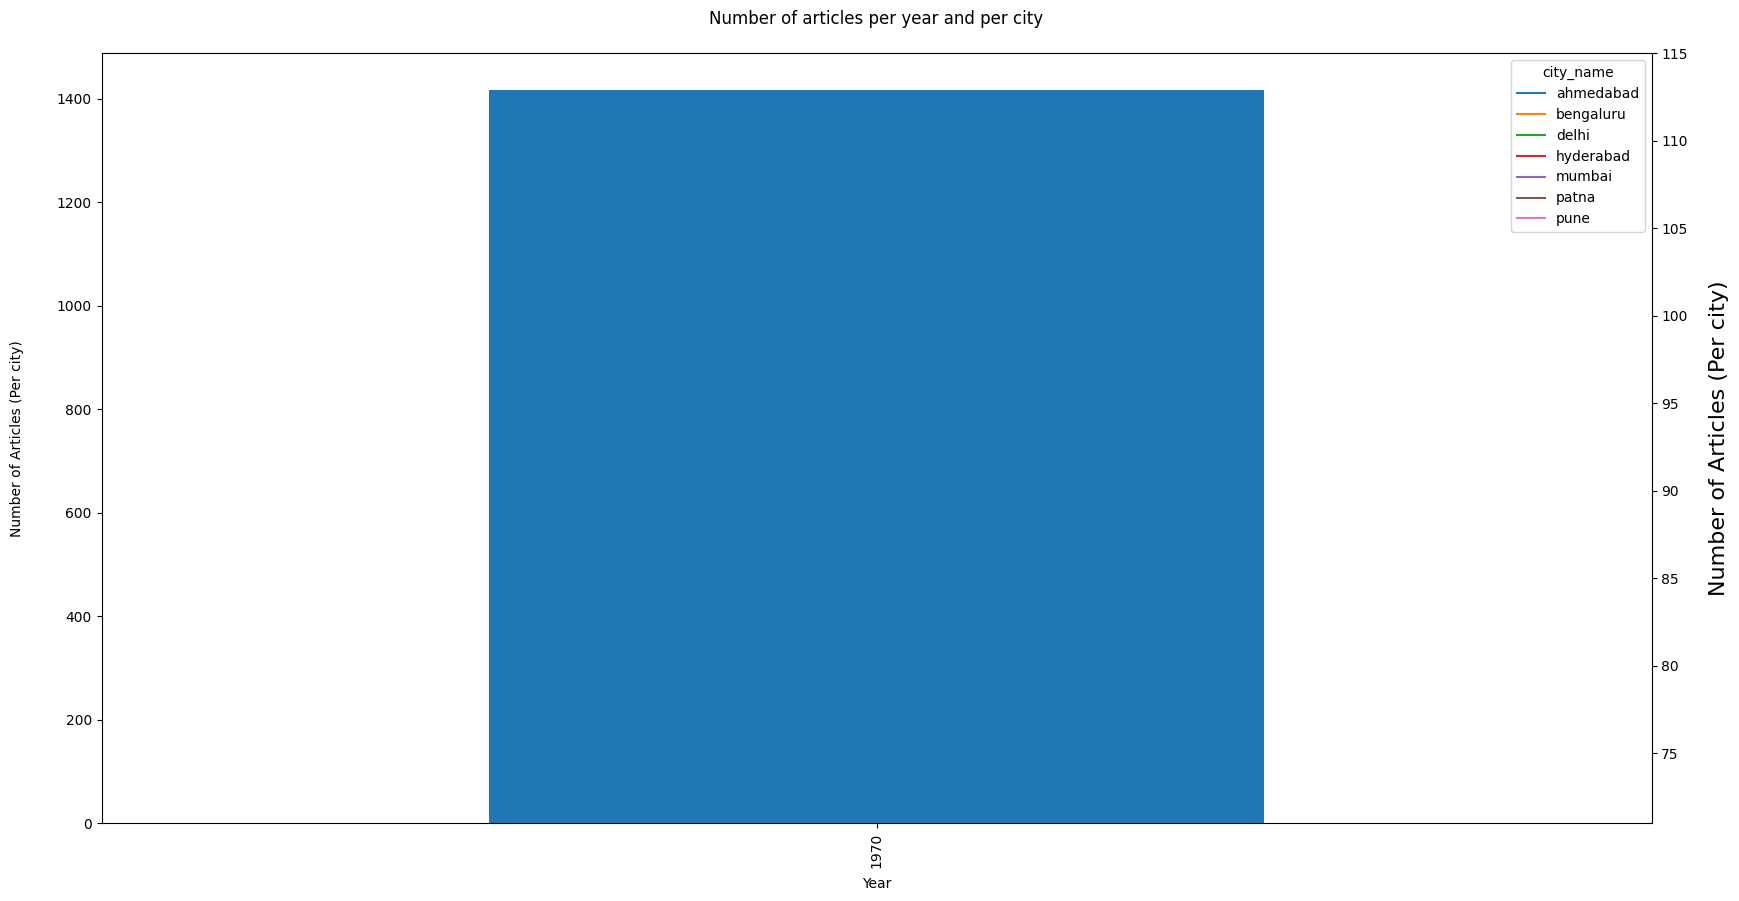

<Figure size 2000x1000 with 0 Axes>

In [42]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year')

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()



**Sentiment Analysis of News Headlines**

In [43]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)

    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'


data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])


final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


from matplotlib import pyplot as plt
final_result['headline_text'].plot(kind='hist', bins=20, title='headline_text')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
final_result['headline_text'].plot(kind='line', figsize=(8, 4), title='headline_text')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


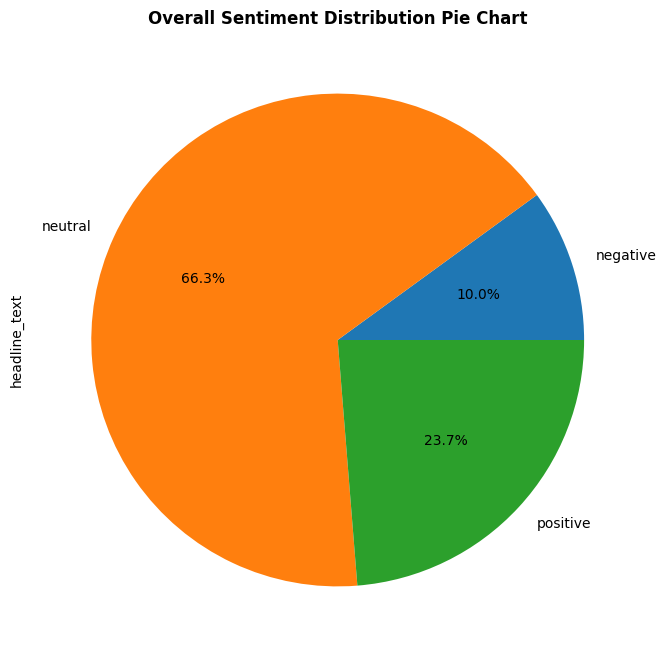

In [45]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()
